In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os


In [ ]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
 99% 1.96G/1.98G [00:28<00:00, 146MB/s]
100% 1.98G/1.98G [00:28<00:00, 75.0MB/s]


In [ ]:
!unzip /content/fruit-and-vegetable-image-recognition.zip

Archive:  /content/fruit-and-vegetable-image-recognition.zip
  inflating: test/apple/Image_1.jpg  
  inflating: test/apple/Image_10.jpg  
  inflating: test/apple/Image_2.jpg  
  inflating: test/apple/Image_3.jpg  
  inflating: test/apple/Image_4.jpg  
  inflating: test/apple/Image_5.jpg  
  inflating: test/apple/Image_6.JPG  
  inflating: test/apple/Image_7.jpg  
  inflating: test/apple/Image_8.jpg  
  inflating: test/apple/Image_9.jpg  
  inflating: test/banana/Image_1.jpg  
  inflating: test/banana/Image_10.jpg  
  inflating: test/banana/Image_2.jpg  
  inflating: test/banana/Image_3.jpg  
  inflating: test/banana/Image_4.jpg  
  inflating: test/banana/Image_5.jpg  
  inflating: test/banana/Image_6.jpg  
  inflating: test/banana/Image_8.jpg  
  inflating: test/banana/Image_9.jpg  
  inflating: test/beetroot/Image_1.jpg  
  inflating: test/beetroot/Image_10.jpg  
  inflating: test/beetroot/Image_2.jpg  
  inflating: test/beetroot/Image_3.jpg  
  inflating: test/beetroot/Image_4.jpg  


In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.17.0


In [ ]:
# Create a list with the filepaths for training and testing
train_dir = Path('/content/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [ ]:
test_dir = Path('/content/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [ ]:
val_dir = Path('/content/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [ ]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)

    return df

In [ ]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [ ]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2780

Number of different labels: 36

Labels: ['spinach' 'lettuce' 'chilli pepper' 'cabbage' 'onion' 'tomato' 'raddish'
 'grapes' 'ginger' 'pomegranate' 'beetroot' 'soy beans' 'peas' 'potato'
 'paprika' 'pineapple' 'kiwi' 'orange' 'carrot' 'eggplant' 'pear'
 'sweetcorn' 'banana' 'cucumber' 'lemon' 'sweetpotato' 'capsicum' 'garlic'
 'jalepeno' 'bell pepper' 'corn' 'mango' 'cauliflower' 'turnip' 'apple'
 'watermelon']


In [ ]:
train_df.head(5)

,Filepath,Label
0,/content/train/spinach/Image_54.jpg,spinach
1,/content/train/lettuce/Image_6.jpg,lettuce
2,/content/train/chilli pepper/Image_43.jpg,chilli pepper
3,/content/train/cabbage/Image_11.jpg,cabbage
4,/content/train/onion/Image_93.jpg,onion


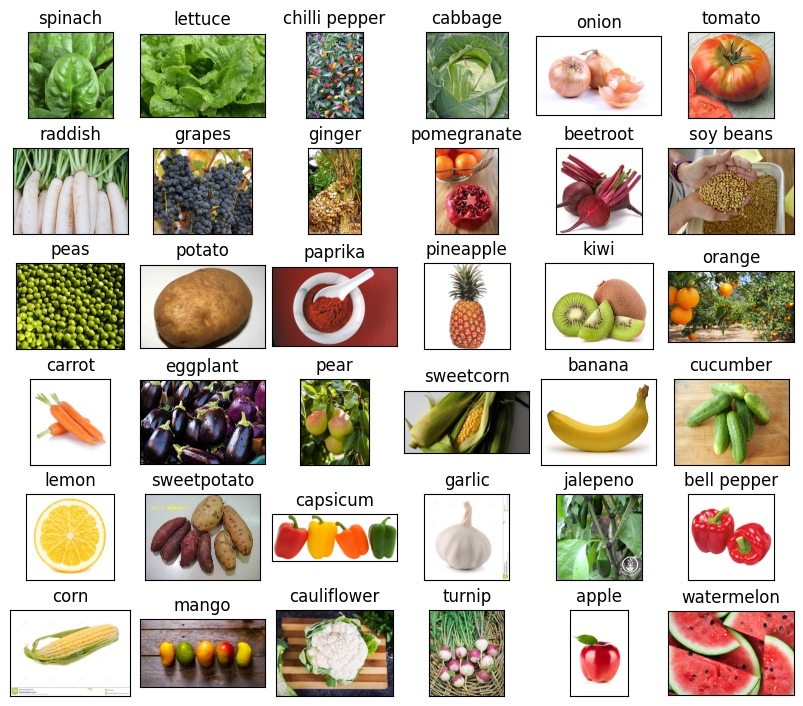

In [ ]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2780 validated image filenames belonging to 36 classes.


In [ ]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 334 validated image filenames belonging to 36 classes.


In [ ]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 334 validated image filenames belonging to 36 classes.


In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


87/87 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.3654 - loss: 2.4958 - val_accuracy: 0.8353 - val_loss: 0.4706
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 116s 776ms/step - accuracy: 0.8292 - loss: 0.5524 - val_accuracy: 0.8982 - val_loss: 0.3126
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 81s 775ms/step - accuracy: 0.9027 - loss: 0.3283 - val_accuracy: 0.9431 - val_loss: 0.2360
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 73s 784ms/step - accuracy: 0.9488 - loss: 0.1848 - val_accuracy: 0.9431 - val_loss: 0.2078
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 72s 767ms/step - accuracy: 0.9535 - loss: 0.1510 - val_accuracy: 0.9341 - val_loss: 0.2015


In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step


['onion',
 'pomegranate',
 'lemon',
 'sweetpotato',
 'pear',
 'carrot',
 'mango',
 'ginger',
 'onion',
 'sweetcorn',
 'lettuce',
 'jalepeno',
 'capsicum',
 'mango',
 'cucumber',
 'beetroot',
 'spinach',
 'sweetpotato',
 'paprika',
 'grapes',
 'potato',
 'watermelon',
 'grapes',
 'soy beans',
 'kiwi',
 'grapes',
 'ginger',
 'potato',
 'pineapple',
 'sweetcorn',
 'pineapple',
 'peas',
 'sweetcorn',
 'eggplant',
 'garlic',
 'tomato',
 'turnip',
 'carrot',
 'eggplant',
 'pomegranate',
 'orange',
 'jalepeno',
 'spinach',
 'mango',
 'turnip',
 'banana',
 'turnip',
 'banana',
 'pear',
 'carrot',
 'cauliflower',
 'cucumber',
 'spinach',
 'cauliflower',
 'ginger',
 'beetroot',
 'eggplant',
 'jalepeno',
 'lettuce',
 'apple',
 'sweetcorn',
 'apple',
 'cucumber',
 'cabbage',
 'capsicum',
 'turnip',
 'apple',
 'garlic',
 'lettuce',
 'onion',
 'mango',
 'potato',
 'onion',
 'lemon',
 'sweetpotato',
 'pear',
 'pineapple',
 'banana',
 'peas',
 'pear',
 'grapes',
 'cabbage',
 'tomato',
 'chilli pepper'

In [ ]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [ ]:
img = output('/content/test/cabbage/Image_1.jpg')
img

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


'cabbage'

In [ ]:
model.save('final.h5')